<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Load-networks" data-toc-modified-id="Load-networks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load networks</a></span></li><li><span><a href="#Centralities" data-toc-modified-id="Centralities-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Centralities</a></span><ul class="toc-item"><li><span><a href="#In-degree" data-toc-modified-id="In-degree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>In-degree</a></span></li><li><span><a href="#Out-degree" data-toc-modified-id="Out-degree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Out-degree</a></span></li><li><span><a href="#Closeness" data-toc-modified-id="Closeness-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Closeness</a></span></li><li><span><a href="#Betweenness" data-toc-modified-id="Betweenness-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Betweenness</a></span></li><li><span><a href="#PageRank" data-toc-modified-id="PageRank-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>PageRank</a></span></li></ul></li><li><span><a href="#League-level" data-toc-modified-id="League-level-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>League-level</a></span><ul class="toc-item"><li><span><a href="#In-degree" data-toc-modified-id="In-degree-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>In-degree</a></span></li><li><span><a href="#Out-degree" data-toc-modified-id="Out-degree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Out-degree</a></span></li><li><span><a href="#Closeness" data-toc-modified-id="Closeness-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Closeness</a></span></li><li><span><a href="#Betweenness" data-toc-modified-id="Betweenness-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Betweenness</a></span></li><li><span><a href="#PageRank" data-toc-modified-id="PageRank-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>PageRank</a></span></li></ul></li><li><span><a href="#Simple-facts" data-toc-modified-id="Simple-facts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple facts</a></span><ul class="toc-item"><li><span><a href="#Degree-distribution" data-toc-modified-id="Degree-distribution-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Degree distribution</a></span></li><li><span><a href="#Neighborhood-overlap" data-toc-modified-id="Neighborhood-overlap-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Neighborhood overlap</a></span></li><li><span><a href="#Communities" data-toc-modified-id="Communities-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Communities</a></span></li></ul></li></ul></div>

# Goal

The goal of this notebook is to perform centralities analysis of the clubs participating in transfers. We want to see the variations that exists between the three type of transfers: **Monetary Transfers**, **Free transfers** and **loans**. We will not take into account the swaps, as it represents less than 100 transfers in our data.

# Load networks

As explained in the previous notebooks, the **nodes** in the networks represent football clubs. An edge between two nodes represents a **transfer**: one football player leaves *Club A* and goes playing for *Club B*. Each edge stores information about the transfer, like the player name or the managers of the two clubs. We are dealing with **Multi Directed Graphs**

In [5]:
import networkx as nx

In [6]:
G_monetary  = nx.read_gml("networks/transfers_transfer_network.gml")
G_loans     = nx.read_gml("networks/transfers_loan_network.gml")
G_free      = nx.read_gml("networks/transfers_free_network.gml")

In [82]:
print(nx.info(G_monetary))
print("Is connected:", nx.is_connected(G_monetary.to_undirected()))
print()
print(nx.info(G_loans))
print("Is connected:", nx.is_connected(G_loans.to_undirected()))
print()
print(nx.info(G_free))
print("Is connected:", nx.is_connected(G_free.to_undirected()))

Name: transfer
Type: MultiDiGraph
Number of nodes: 1124
Number of edges: 2913
Average in degree:   2.5916
Average out degree:   2.5916
Is connected: False

Name: loan
Type: MultiDiGraph
Number of nodes: 2664
Number of edges: 10773
Average in degree:   4.0439
Average out degree:   4.0439
Is connected: False

Name: free
Type: MultiDiGraph
Number of nodes: 3851
Number of edges: 30994
Average in degree:   8.0483
Average out degree:   8.0483
Is connected: False


> If we compare the basic informations for the three networks, we can see that there is three times more **loans** than **monetary transfers** and three times more **free transfers** than loans. The average degree is also bigger in loan than transfers, and in free than loan.
>
> This shows that the clubs in our data don't do a lot of monetary transfers. One assumption to explain this fact could be that the data used to create the networks comes from a website doing a very good job at recording transfers in secondary and below leagues, where there is less money flowing compare to primary leagues. The next part of this notebook will verify this hypothesis.

# Centralities

In [10]:
import operator
import pprint

def centralities(centrality_func, networks, n=10):        
    for G in networks:
        print(G.name)
        centrality = dict(centrality_func(G))

        # Centralities are dictionaries : first sort by value, then take only the first n entries
        c_sort = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)[:n]
        # Print
        pprint.pprint([(x,y, G.node[x]['competition']) for x,y in c_sort])
        print()
        print()

## In-degree

In [84]:
centralities(nx.in_degree_centrality, [G_monetary, G_free, G_loans])

transfer
[('AS Roma', 0.019590382902938557, 'Serie A'),
 ('Aston Villa', 0.016918967052537846, 'Premier League'),
 ('Watford', 0.016918967052537846, 'Championship'),
 ('Monaco', 0.016028495102404273, 'Ligue 1'),
 ('Newcastle', 0.016028495102404273, 'A-League'),
 ('Bologna', 0.016028495102404273, 'Serie B'),
 ('Man City', 0.016028495102404273, 'Premier League'),
 ('TSG Hoffenheim', 0.014247551202137132, '1.Bundesliga'),
 ('Sunderland', 0.014247551202137132, 'Premier League'),
 ('VfL Wolfsburg', 0.014247551202137132, '1.Bundesliga')]


free
[('Monza', 0.00987012987012987, 'Prima Divisione - A'),
 ('AE Larisa', 0.00909090909090909, 'Football League Nord'),
 ('Boluspor', 0.008831168831168832, '1.Lig'),
 ('Machine Sazi', 0.008831168831168832, 'Azadegan League'),
 ('Venezia', 0.008571428571428572, 'Serie D - Girone C'),
 ('Fortuna Sittard', 0.008311688311688312, 'Jupiler League'),
 ('Vozdovac ', 0.008311688311688312, 'SuperLiga'),
 ('Energie Cottbus', 0.008311688311688312, '3.Liga'),
 ('Depo

The **in-degree** centrality deals with the number of new players clubs acquire. In the **monetary transfers**, we can see clubs from primary leagues, with centralities values close one to the others. The **free** and **loan** network versions have top-ranked club less popular, from inferior divisions leagues. This is a first step in confirming the above assumption: popular clubs with money, which are fewer, participate in less transfers and in the vast majority of the monetary ones.

## Out-degree

In [85]:
centralities(nx.out_degree_centrality, [G_monetary, G_free, G_loans])

transfer
[('AS Roma', 0.017809439002671415, 'Serie A'),
 ('Juventus', 0.016918967052537846, 'Serie A'),
 ('Inter', 0.016028495102404273, 'Serie A'),
 ('TSG Hoffenheim', 0.015138023152270703, '1.Bundesliga'),
 ('Benfica', 0.015138023152270703, 'Primeira Liga'),
 ('VfB Stuttgart', 0.015138023152270703, '1.Bundesliga'),
 ('Spurs', 0.014247551202137132, 'Premier League'),
 ('Fiorentina', 0.013357079252003561, 'Serie A'),
 ('Bor. Dortmund', 0.01246660730186999, '1.Bundesliga'),
 ('Genoa', 0.01246660730186999, 'Serie A')]


free
[('Parma', 0.016363636363636365, 'Serie A'),
 ('Nacional', 0.01038961038961039, 'Primera Division Clausura'),
 ('Borac Cacak', 0.01012987012987013, 'SuperLiga'),
 ('Grosseto', 0.00987012987012987, 'Prima Divisione - B'),
 ('Jagodina', 0.00961038961038961, 'SuperLiga'),
 ('OFK Beograd', 0.00935064935064935, 'SuperLiga'),
 ('Monza', 0.008831168831168832, 'Prima Divisione - A'),
 ('Chiajna', 0.008831168831168832, 'Liga 1'),
 ('Tosno', 0.008571428571428572, '1.Division')

Regarding the **out-degree** centralities:
- we can see again that popular clubs are the owns *selling* the most players. 
- The **free** ranking is a bit different, compare to the *in-degree* version. There is almost only clubs from primary divisions. One assumption could be that players in the final phase of their careers leave a mid-table club for free and return to their home country league. It will be interesting to compare those findings with the ones taking player's age into account.
- The **loan** version contains clubs exclusively from primary divisions. This makes sens, as top clubs have the habit to buy young and promising players and directly "send" them to less stressful teams in order to win experiences. This ranking is composed a lot of italian clubs and the club leading this ranking is **Juventus**, the previous winner of the primary italian division. We can note that in the **in-degree** version, the *loan* ranking was also composed of a lot of italian clubs, but this time from inferior divisions. One possible explanation is that clubs from primary division "send" their young players to teams playing in the secondary and tertiary italian divisions.

> **Interesting fact**: In the **free** ranking, the club **Parma** appears first, with a centrality value 60% higher than the second one. Why ? Because this football club had has financial troubles and had to declare bankruptcy in 2015. Thus a lot of player left the club for free.

> **Interesting fact #2**: As pointed out previously, there is a lot of italian clubs in the **loan** rankings, both in and out degree versions. This might be a cultural thing: in Italy, some clubs have a reputation of being **farm clubs** club. taking young players on loan from bigger teams. Why in Italy mainly ? Because the italian rules allow italian clubs [to *co-own* players](http://www.bbc.com/sport/football/34125476).

## Closeness

In [86]:
centralities(nx.closeness_centrality, [G_monetary, G_free, G_loans])

transfer
[('Watford', 0.21876649240023918, 'Championship'),
 ('Inter', 0.20834204880264393, 'Serie A'),
 ('Aston Villa', 0.20619704597538321, 'Premier League'),
 ('AS Roma', 0.2051749191777524, 'Serie A'),
 ('Man City', 0.2051749191777524, 'Premier League'),
 ('Werder Bremen', 0.20490406119863988, '1.Bundesliga'),
 ('Sevilla FC', 0.20289519785355517, 'Primera División'),
 ('Olympiacos', 0.2024321178454121, 'Super League'),
 ('Hamburger SV', 0.20216844852877855, '1.Bundesliga'),
 ('Southampton', 0.2017086762286806, 'Premier League')]


free
[('AEL Limassol', 0.2415727602705824, 'Division A'),
 ('Ethnikos', 0.23970572385519484, 'Division A'),
 ('Omonia Nikosia', 0.23854227761485827, 'Division A'),
 ('Ermis Aradippou', 0.23816880502633128, 'Division A'),
 ('Poli Timisoara', 0.23485944580342463, 'Liga II - Seria II'),
 ('AOK Kerkyra', 0.2343425896286812, 'Super League'),
 ('Dinamo Bukarest', 0.23382800335369505, 'Liga 1'),
 ('Boluspor', 0.23314539350592484, '1.Lig'),
 ('FC Koper', 0.232365

As previously, one top-clubs compose the **monetary transfers** ranking. Those clubs are all european and mainly from **England** and **italy**. It's interesting to know that **Watford**, the ranking leader, was managed in 2016/2016 by an italian manager and it's now managed by a portuguese one. The closeness centralities values are pretty close one to the others.

The **loan** ranking is interesting, as there is some **portuguese clubs**. Portuguese clubs are known for making transfers with south-american players, mostly Brazilian ones, wishing to have a career in Europe. Why Portugal? Because of the cultural and language proximity. Those players are then sell to higher-value european clubs, or go back at home in case of failure. Thus, founding portuguese clubs in this ranking isn't surprising.

We can notice that in this centrality rankings, almost all clubs are from first division leagues.

## Betweenness

In [87]:
centralities(nx.betweenness_centrality, [G_monetary, G_free, G_loans])

transfer
[('AS Roma', 0.01711181831280997, 'Serie A'),
 ('Inter', 0.016617393196635806, 'Serie A'),
 ('TSG Hoffenheim', 0.01475359410206666, '1.Bundesliga'),
 ('Torino', 0.014615233829005703, 'Serie A'),
 ('Juventus', 0.013337017474766328, 'Serie A'),
 ('FC Basel', 0.013041044100401324, 'Raiffeisen Super League'),
 ('Sampdoria', 0.012365327870391015, 'Serie A'),
 ('Man City', 0.01205023063322892, 'Premier League'),
 ('Standard Liège', 0.011989378492321491, 'Jupiler Pro League'),
 ('Newcastle', 0.011927555874244468, 'A-League')]


free
[('Nacional', 0.014837642999531478, 'Primera Division Clausura'),
 ('Parma', 0.012455154882935818, 'Serie A'),
 ('FC Koper', 0.011914946819203992, 'Prva Liga'),
 ('RNK Split', 0.010033090258060571, '1.HNL'),
 ('Borac Cacak', 0.00959899371237437, 'SuperLiga'),
 ('Catania', 0.008819051113285592, 'Serie B'),
 ('FSV Frankfurt', 0.008621873303667102, '2.Bundesliga'),
 ('FC Chiasso', 0.008493548002931128, 'Challenge League'),
 ('Petr. Ploiesti', 0.0083257276033

The **betweenness** rankings are a bit more difficutly to make sens of.
As before, we can notice that each of those has **italian clubs** among the top ones.

## PageRank

In [12]:
def getDiGraph(G):
    """
    Transforms a Multidirected network into a directed one.
    Between two nodes, sum the value of each transfer (if exist) and the number of transfers.
    """
    # Create the network
    dG = nx.DiGraph()
    dG.name = G.name
    # Add nodes and edges iteratively
    for u,v,data in G.edges(data=True):
        dG.add_node(u, competition=G.node[u]['competition'])
        dG.add_node(v, competition=G.node[v]['competition'])
        val = float(data['transferValue']) if 'transferValue' in data else 0.0
        if dG.has_edge(u,v):
            dG[u][v]['transferValue'] += val
            dG[u][v]['nbr'] += 1
        else:
            dG.add_edge(u, v, transferValue=val, nbr=1)
    return dG

In [13]:
centralities(nx.pagerank, [getDiGraph(G_monetary), getDiGraph(G_free), getDiGraph(G_loans)])

transfer
[('Aston Villa', 0.009450807341304417, 'Premier League'),
 ('Man City', 0.00800889271244839, 'Premier League'),
 ('Derby', 0.007285361960911124, 'Championship'),
 ('Bournemouth', 0.006922364431278031, 'Championship'),
 ('Leicester', 0.006632989708004769, 'Premier League'),
 ('Newcastle', 0.0063326818309913475, 'A-League'),
 ('Trabzonspor', 0.006261604784312014, 'Süper Lig'),
 ('Watford', 0.006177541484911631, 'Championship'),
 ('TSG Hoffenheim', 0.005915994184669219, '1.Bundesliga'),
 ('Middlesbrough', 0.005755649948965327, 'Championship')]


free
[('Rapperswil-Jona', 0.001388524998732724, '1.Liga Promotion '),
 ('SC YF Juventus', 0.0013280124179460438, '1.Liga Promotion '),
 ("L'Aquila", 0.0013002560090644346, 'Prima Divisione - B'),
 ('Nigde Belediye', 0.0012009487887170078, '2.Lig Kirmizi'),
 ('FC UNA Strassen', 0.0011096557281470988, 'BGL Ligue'),
 ('US Esch', 0.0010876549848712884, 'Ehrenpromotion'),
 ('KFC Uerdingen', 0.0010759409870058057, 'Regionalliga West'),
 ('Tepec

In [14]:
print("transfer - weighted")
G = getDiGraph(G_monetary)
centrality = nx.pagerank(G, weight='transferValue')
c_sort = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)[:10]
pprint.pprint([(x,y, G.node[x]['competition']) for x,y in c_sort])

transfer - weighted
[('Man City', 0.03103175159030256, 'Premier League'),
 ('Chelsea', 0.018859219692449972, 'Premier League'),
 ('Liverpool', 0.016521512559772838, 'Premier League'),
 ('Man Utd', 0.015378885890160468, 'Premier League'),
 ('Paris SG', 0.014836339027604669, 'Ligue 1'),
 ('Valencia CF', 0.014563069120729754, 'Primera División'),
 ('AS Roma', 0.01363052049819213, 'Serie A'),
 ('Juventus', 0.012463074676151075, 'Serie A'),
 ('Newcastle', 0.01236200859199397, 'A-League'),
 ('Crystal Palace', 0.01235362406093607, 'Premier League')]


In the **transfer** version, weighted with the number of transfers, almost all clubs are from England, primary or secondary division mixed. But in the **free** ranking, there is no club from a first division, only *small* clubs. Interestingly, first both clubs are from Switzerland. We note the same behavior on the **loan** ranking, mainly composed of clubs from inferior divisions. This conforts our previous findings: clubs from the primary division are mainly important in the monetary transfers, but not so in the loans and free version.

In the transfer version, but weighted with transfer's fees, most *famous* clubs are present. There is mainly clubs from England, with a lot of financial power, or clubs recently bought by new investors, like Paris SG and Valencia.

# League-level

Build the same network, but at the league level.

- **Nodes** are competitions where club evolve.
- **Edges** represente the number of transfer from a competition to another one.

In [16]:
def Graph_leaguelevel(G):
    leagues = list(nx.get_node_attributes(G,'competition').values())
    
    G_leagues = nx.DiGraph()
    G_leagues.name = G.name
    G_leagues.add_nodes_from(list(set(leagues)))
    
    for n1,n2,e in G.edges(data=True):
        c1 = G.nodes[n1]['competition']
        c2 = G.nodes[n2]['competition']

        if G_leagues.has_edge(c1, c2):
            G_leagues[c1][c2]['nbr'] += 1
        else:
            G_leagues.add_edge(c1, c2, nbr=1)
    
    return G_leagues

In [17]:
G_league_monetary = Graph_leaguelevel(G_monetary)
G_league_free     = Graph_leaguelevel(G_free)
G_league_loan     = Graph_leaguelevel(G_loans)

In [80]:
print(nx.info(G_league_monetary))
print("Is connected:", nx.is_connected(G_league_monetary.to_undirected()))
print()
print(nx.info(G_league_loan))
print("Is connected:", nx.is_connected(G_league_loan.to_undirected()))
print()
print(nx.info(G_league_free))
print("Is connected:", nx.is_connected(G_league_free.to_undirected()))

Name: transfer
Type: DiGraph
Number of nodes: 157
Number of edges: 967
Average in degree:   6.1592
Average out degree:   6.1592
Is connected: False

Name: loan
Type: DiGraph
Number of nodes: 234
Number of edges: 1636
Average in degree:   6.9915
Average out degree:   6.9915
Is connected: False

Name: free
Type: DiGraph
Number of nodes: 321
Number of edges: 5051
Average in degree:  15.7352
Average out degree:  15.7352
Is connected: False


## In-degree

In [12]:
def centralities_league(centrality_func, networks, n=10):
    for G in networks:
        print(G.name)
        centrality = dict(centrality_func(G))

        # Centralities are dictionaries : first sort by value, then take only the first n entries
        c_sort = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)[:n]
        # Print
        pprint.pprint(c_sort)
        print()
        print()

In [13]:
centralities_league(nx.in_degree_centrality, [G_league_monetary, G_league_free, G_league_loan])

transfer
[('Chinese Super League', 0.2564102564102564),
 ('Süper Lig', 0.25),
 ('1.Bundesliga', 0.23717948717948717),
 ('Serie A', 0.22435897435897434),
 ('Jupiler Pro League', 0.21794871794871795),
 ('Premier League', 0.20512820512820512),
 ('Ligue 1', 0.1987179487179487),
 ('Championship', 0.1923076923076923),
 ('Primera División', 0.1858974358974359),
 ('Serie B', 0.15384615384615385)]


free
[('Division A', 0.22187500000000002),
 ('Liga 1', 0.2),
 ('Ekstraklasa', 0.19375),
 ('Super League', 0.18125000000000002),
 ('Premier Liga', 0.17500000000000002),
 ('Primera División', 0.171875),
 ('Premier League', 0.16562500000000002),
 ('1.Lig', 0.1625),
 ('Süper Lig', 0.15937500000000002),
 ('Jupiler League', 0.15625)]


loan
[('Primera División', 0.15450643776824036),
 ('Serie A', 0.11587982832618025),
 ('Segunda División', 0.1072961373390558),
 ('Championship', 0.10300429184549356),
 ('Campeonato Brasileiro Série A', 0.10300429184549356),
 ('Jupiler Pro League', 0.10300429184549356),
 ('P

We first see that there is a much bigger variation in the centralities values compare to the club version.

In the **transfer** ranking, the first two leagues are the primary leagues from **China** and **Turkey**. It's interesting since no clubs from those leagues were present in the club ranking version. This means that chinese and turkish clubs are pretty homogeneous in terms of transfers: there is no club that does more transfer than the others, they all follow the same transfer strategy. Clubs from the **Jupiler Pro League**, from Belgium, also have the same type of attitude. 

Even if the leagues in this ranking are mainly issued from primary division, two secondary division leagues are present: **Championship** is the England second division and one of the "richest" league in Europe, **Serie B** is from Italy and confirms a fact already observed with clubs - Italian clubs where highly active in monetary transfers last years.

> Note that the network doesn't take transfer value in consideration.

Among the top 3 leagues in the **loan** ranking, the primary and secondary divisions from **Spain** are present. And once again, there was no spanish club in the same ranking at club-level. Following the same analysis as for Chinese and Turkish clubs in the monetary transfers, this means that spanish clubs have a *football loan* culture, as for Italy. But the difference is that in Italy, only a subset of clubs participate in this type of transfers, where in Spain it appears that much more clubs follow the same "loan strategy". Similar behavior can be observer with **Portuguese** clubs (*Primeira Liga* and *Segunda Liga*).

## Out-degree

In [14]:
centralities_league(nx.out_degree_centrality, [G_league_monetary, G_league_free, G_league_loan])

transfer
[('Serie A', 0.1794871794871795),
 ('Ligue 1', 0.1794871794871795),
 ('1.Bundesliga', 0.17307692307692307),
 ('SuperLiga', 0.17307692307692307),
 ('Primera División', 0.16666666666666666),
 ('Eredivisie', 0.16666666666666666),
 ('Campeonato Brasileiro Série A', 0.15384615384615385),
 ('Superligaen', 0.14743589743589744),
 ('1.HNL', 0.14743589743589744),
 ('Liga 1', 0.14102564102564102)]


free
[('Liga 1', 0.225),
 ('Premier League', 0.21250000000000002),
 ('Premier Liga', 0.21250000000000002),
 ('Serie A', 0.2),
 ('SuperLiga', 0.2),
 ('Division A', 0.19687500000000002),
 ('Primera División', 0.19062500000000002),
 ('Primeira Liga', 0.184375),
 ('Super League', 0.18125000000000002),
 ('Jupiler Pro League', 0.178125)]


loan
[('Serie A', 0.2575107296137339),
 ('Campeonato Brasileiro Série A', 0.18884120171673818),
 ('Primera División', 0.17167381974248927),
 ('Primeira Liga', 0.17167381974248927),
 ('Jupiler Pro League', 0.1630901287553648),
 ('Premier Liga', 0.15450643776824036

Comparing the in-degree and out-degree **monetary transfers** ranking, we can notice that Chinese and Turkish leagues don't appear in the second one: In 2015-2016, football players go more often to those countries that they leave. This is expected, as both countries have increase football interests recently. Another expected fact: find the **Brazilian** primary league in this out-degree ranking. The brazilian league is present in the top-10 ranking for monetary transfers, and is at second position in the **loan** rankings. This must be linked directly with Spanish and Portuguese clubs in the in-degree ranking version.

The german league (*1. Bundesliga*) in present in the top-5 of both version of the monetary transfers ranking: german top clubs seem to have less stable teams in those last years.

The **free** versions of the in and out degree centralities are the only ones to contains leagues from eastern Europe, where there is less money flowing. But money flowing in leagues isn't the key differentiator, because the english league is present everywhere. Compare to the two other rankings, the free ones have a lot of overlap between the in and out degree version.

## Closeness

In [15]:
centralities_league(nx.closeness_centrality, [G_league_monetary, G_league_free, G_league_loan])

transfer
[('Süper Lig', 0.46814825900429013),
 ('1.Bundesliga', 0.4540154813739719),
 ('Chinese Super League', 0.4523086562560247),
 ('Jupiler Pro League', 0.44726432179963777),
 ('Serie A', 0.4439634780963195),
 ('Premier League', 0.44233125942684764),
 ('Ligue 1', 0.43434694066463014),
 ('Championship', 0.42664575377341335),
 ('Primera División', 0.42364120621162876),
 ('Raiffeisen Super League', 0.4092316413744985)]


free
[('Division A', 0.4867301458670989),
 ('Liga 1', 0.4835950080515298),
 ('Premier Liga', 0.4782046178343949),
 ('Ekstraklasa', 0.4774443561208267),
 ('2.Bundesliga', 0.4766865079365079),
 ('3.Liga', 0.4766865079365079),
 ('Corgon liga', 0.472189465408805),
 ('1.Lig', 0.4707092476489028),
 ('Jupiler League', 0.46416151468315303),
 ('Super League', 0.4620192307692308)]


loan
[('Primera División', 0.3331792670848465),
 ('Jupiler Pro League', 0.3123555628920436),
 ('Serie A', 0.3116065087843888),
 ('Primeira Liga', 0.30864587687194805),
 ('Segunda Liga', 0.30430893246

First, we can notice that the closeness centralities are all high, almost at 0.5.

The **monetary** ranking is coherent with the in-degree ranking, with the **Turkish** and **Chinese** leagues in the top of rankings. One more time, the **Championship** (England) is the only secondary division league present in the monetary ranking. This clearly demonstrates the importance of this league in the transfer market. But this centrality measure also gives results more complicated to analyse: the belgium and swiss leagues appear in this ranking, quite surprisingly. Otherw§ise, the **big 5** is always present: Germany, Italy, England, France and Spain.

In the **free** transfers ranking, we can directly notice that all centralities values are pretty close one to the others. There is no league with a lot of money flowing in and out, the ranking is mainly composed of inferiors division. The fact of having such close centralities values also means that there is no *outstanding* or *central* league, they are close in a network point of view.

The **loan** ranking also has close centralities values. We can notice, as before, the presence of the primary and secondary divisions from **Spain** and **Portugal**.

## Betweenness

In [16]:
centralities_league(nx.betweenness_centrality, [G_league_monetary, G_league_free, G_league_loan])

transfer
[('1.Bundesliga', 0.06382851020381158),
 ('Primera División', 0.06304277466256948),
 ('Serie A', 0.06119675273113488),
 ('Süper Lig', 0.05070767600901971),
 ('Jupiler Pro League', 0.048578695833943655),
 ('Ligue 1', 0.04757196511009603),
 ('Premier League', 0.04163758959531061),
 ('Raiffeisen Super League', 0.03854387927826382),
 ('Serie B', 0.037547214260061926),
 ('Ekstraklasa', 0.03408583402475891)]


free
[('Veikkausliiga', 0.04928273686522184),
 ('Regionalliga Nord', 0.04258825523924995),
 ('3.Liga', 0.042458697849449584),
 ('Regionalliga West', 0.0422944928643607),
 ('Premier League', 0.03630490765204241),
 ('Jupiler League', 0.03435896121485405),
 ('Liga 1', 0.03299071071058927),
 ('Regionalliga Nordost', 0.02785347926715838),
 ('Regionalliga Südwest', 0.026083645058399108),
 ('Corgon liga', 0.02575889295636737)]


loan
[('Serie A', 0.07622959440686158),
 ('Primera División', 0.0674186653750084),
 ('Campeonato Brasileiro Série A', 0.05930308384892326),
 ('Primeira Liga'

All centralities values are small, but in can see as before that the **top five** plus Swiss and Belgium leagues are present in the **monetary transfers** ranking. Western Europe is really the central place for monetary transfers.

As for the *closeness centrality*, the rankings for **free** and **loan** transfers are very different from the ones of in/out-degree, with a mix of inferior division and some primary ones. We can note that the **Premier League** is present everywhere.

## PageRank

In [21]:
def getDiGraph_League(G):
    """
    Transforms a Multidirected network into a directed one.
    Between two nodes, sum the value of each transfer (if exist) and the number of transfers.
    """
    # Create the network
    dG = nx.DiGraph()
    dG.name = G.name
    # Add nodes and edges iteratively
    for u,v,data in G.edges(data=True):
        dG.add_node(u)
        dG.add_node(v)
        val = float(data['transferValue']) if 'transferValue' in data else 0.0
        if dG.has_edge(u,v):
            dG[u][v]['transferValue'] += val
            dG[u][v]['nbr'] += 1
        else:
            dG.add_edge(u, v, transferValue=val, nbr=1)
    return dG

In [23]:
def centralities_leagues(centrality_func, networks, n=10):        
    for G in networks:
        print(G.name)
        centrality = dict(centrality_func(G))

        # Centralities are dictionaries : first sort by value, then take only the first n entries
        c_sort = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)[:n]
        # Print
        pprint.pprint([(x,y) for x,y in c_sort])
        print()
        print()

In [26]:
centralities_leagues(nx.pagerank, [getDiGraph_League(G_league_monetary), getDiGraph_League(G_league_free), getDiGraph_League(G_league_loan)])

transfer
[('Chinese Super League', 0.04129375525146698),
 ('1.Bundesliga', 0.03487473615462927),
 ('Süper Lig', 0.03301167140580481),
 ('Premier League', 0.03203026390562154),
 ('Jupiler Pro League', 0.028370508863583895),
 ('Championship', 0.0265286310996927),
 ('Primera División', 0.02571415662825804),
 ('Segunda División B - Grupo IV', 0.02539338974453924),
 ('Serie A', 0.02444504826841174),
 ('Serie B', 0.022150168233590867)]


free
[('Division A', 0.011490550755201277),
 ('Liga 1', 0.010342253569735855),
 ('Ekstraklasa', 0.01027708638849847),
 ('Corgon liga', 0.009187072376846824),
 ('Jupiler League', 0.00902245108502861),
 ('Regionalliga Nord', 0.008980868758455997),
 ('Super League', 0.008932109664010581),
 ('Premier League', 0.008925114608356138),
 ('Premier Liga', 0.008850450123241545),
 ('Primera División', 0.008752693845141386)]


loan
[('Kategoria Superiore', 0.026209369873113723),
 ('First Division League', 0.014534880712728961),
 ('Serie D - Girone G', 0.01313634698317284

The pagerank centrality for the transfer version is interesting, with the **Chinese** league being first, with a centrality value bigger than the second one. This is due to the massive offensive of chinese clubs in the transger market these last three years. Most surprisingly, the Turkish and Belgium league appear in this top 5. Below, the centralities are very close ones to the others, but we can se that a small spanish division seems important. The free and loan rankings are mainly composed of inferior division, once more asserting our assumption of popular and powerful clubs making business almost entirely with monetary transfers.

# Simple facts

## Degree distribution

In [23]:
import matplotlib.pyplot as plt
def nx_hist(x, bins, i=-1, normed = False, title = None, yscale = 'linear', xlabel = 'Degree', ylabel = 'Probability'): 
    density = None
    if(normed):
        density = 1
    if i != -1:
        plt.subplot(1,2,i)
    plt.hist(x, bins=bins, normed=density)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.title(title)
    plt.grid(True)

transfer


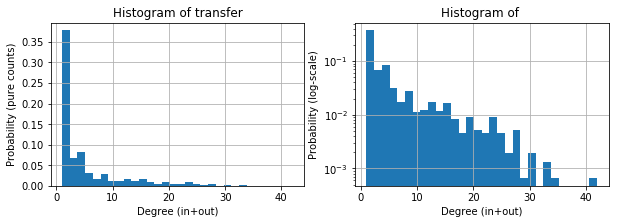

free


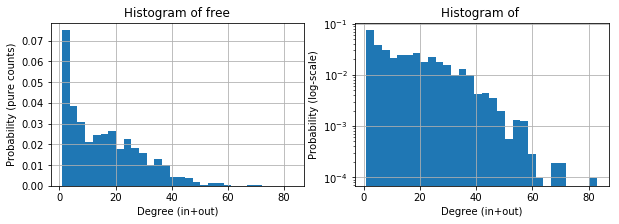

loan


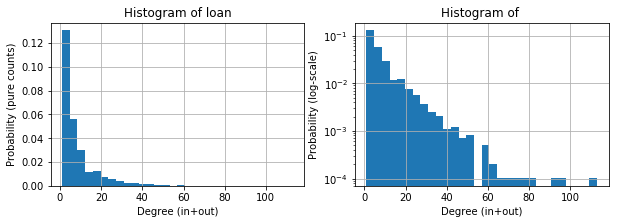

In [88]:
for G in [G_monetary, G_free, G_loans]:
    print(G.name)
    plt.figure(figsize=(10,3))
    nx_hist(list(dict(G.degree()).values()), 30, 1, normed=True, title = 'Histogram of '+G.name, xlabel = 'Degree (in+out)', ylabel = 'Probability (pure counts)')
    nx_hist(list(dict(G.degree()).values()), 30, 2, normed=True, title = 'Histogram of ', yscale = 'log', xlabel = 'Degree (in+out)', ylabel = 'Probability (log-scale)')
    plt.show()

We can see that all type of transfers behave similarly with a lot of clubs participating in less than 5 transfers over the two years of interest.The progression of the degree distribution for the **free transfers** is completely different from the two others. It seems that clubs don't hesitate on doing free transfers, compare to loans and monetary transfers.

## Neighborhood overlap

In [139]:
def getNeigboursPerMajor(G, major):
    neighbours = []
    for n,attr in G.node.items():
        if attr['competition'] == major:
            neighbours.append(nx.neighbors(G,n))
    return [x for l in neighbours for x in l]


def commonNeighbors(G,a,b):
    a_neighbours = set(getNeigboursPerMajor(G, a))
    b_neighbours = set(getNeigboursPerMajor(G, b))
    return len(a_neighbours & b_neighbours)
    
def atLeastOneNeighbors(G,a,b):
    a_neighbours = set(getNeigboursPerMajor(G, a))
    b_neighbours = set(getNeigboursPerMajor(G, b))
    return len(a_neighbours | b_neighbours)

In [156]:
from tabulate import tabulate
def compute_neigborhood(G):
    # Store all values in a list
    neighbourhoodOverlap = list()

    # Compute the neighborhood overlap for each competition
    competition_copy = list(set([v['competition'] for n,v in G.nodes()(data=True)]))
    for a in set([v['competition'] for n,v in G.nodes()(data=True)]):
        for b in competition_copy:
            if a!=b:
                val1 = commonNeighbors(G,a,b)
                val2 = max(atLeastOneNeighbors(G, a,b),1)

                neighbourhoodOverlap.append([a, b, val1/val2])

        competition_copy.remove(a)
        
    return neighbourhoodOverlap

transfer


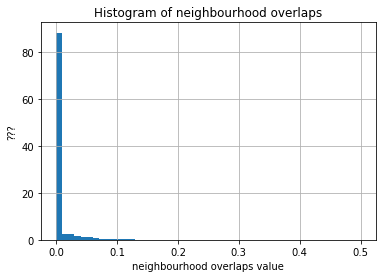

20 links with highest neighbourhood overlap
-----------------------------  ------------------------------  --------
Segunda División B - Grupo IV  Prva Crnogorska Liga            0.5
Premium Liiga                  Pepsideild                      0.333333
Championship                   League One                      0.258065
Veikkausliiga                  A Grupa - Relegation group      0.25
Regionalliga West              Oberliga Niederrhein            0.25
1 Liga                         2 Liga                          0.25
Segunda División B - Grupo IV  Segunda División B - Grupo III  0.25
Prima Divisione - A            USL Pro                         0.25
Relegation Liga 1              Liga II - Seria II              0.25
Campionato Primavera Girone C  U19 Allsvenskan Södra           0.25
Serie B                        Serie A                         0.247619
Primera División               Premier League                  0.235669
Primera División               Serie A               

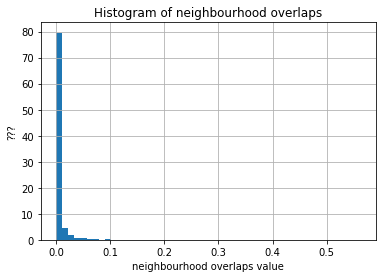

20 links with highest neighbourhood overlap
------------------------------------------  ----------------------------------------------  --------
J. League Division 1 – Second Stage         J. League Division 2                            0.5625
Landesliga Niedersachsen - Hannover (beta)  Landesliga Niedersachsen - Braunschweig (beta)  0.5
2.Lig Kirmizi                               2.Lig Beyaz                                     0.485981
Azadegan League                             Iranian Pro League                              0.463415
League One                                  League Two                                      0.45283
Prima Divisione - A                         Prima Divisione - B                             0.415254
Segunda División B - Grupo I                Segunda División B - Grupo II                   0.385185
Prima Divisione - Girone C                  Prima Divisione - A                             0.382775
Segunda División B - Grupo I                Segunda Div

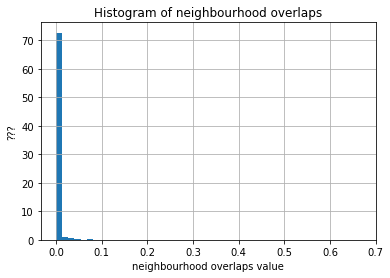

20 links with highest neighbourhood overlap
-----------------------------------  -----------------------------  --------
2.HNL                                Druga Liga                     0.666667
Esiliiga                             Premium Liiga                  0.428571
J. League Division 1 – Second Stage  J. League Division 2           0.421053
Championship                         League One                     0.408537
League One                           League Two                     0.386364
League One                           U21 Premier League             0.376923
Conference National                  League Two                     0.355556
Championship                         U21 Premier League             0.354839
Serie B                              Serie A                        0.339744
Scottish Premiership                 Scottish Championship          0.333333
3 Liga - Gruppe 2                    3 Liga - Gruppe 3              0.333333
Championship                    

In [221]:
for G in [G_monetary, G_free, G_loans]:
    print(G.name)
    
    neighbourhoodOverlap = compute_neigborhood(G)
    neighbourhoodOverlap_Values = list(map(lambda x: x[2], neighbourhoodOverlap))

    nx_hist(neighbourhoodOverlap_Values, 50, normed=True, title = 'Histogram of neighbourhood overlaps', xlabel = 'neighbourhood overlaps value', ylabel = '???')
    plt.show()

    n = 20
    print(n,"links with highest neighbourhood overlap")
    l = sorted(neighbourhoodOverlap, key=operator.itemgetter(2), reverse=True)[:n]
    print(tabulate(l))
    
    print()
    print()

With this neighborhood  overlap measures, leagues that didn't appear in centralities measures are appearing now.

## Communities

In [8]:
# import the Louvain algorithm
import community as community

Take only a subset of the graph: All edges where one of the two nodes is part of the main european leagues.

In [169]:
leagues = ['Premier League', 'Championship', 'Serie A', 'Ligue 1', '1.Bundesliga', 'Primera División', 'Primeira Liga', ]

In [220]:
for G in [G_monetary, G_free, G_loans]:
    G_new = nx.MultiDiGraph()

    print("================================================", G.name,"================================================")
    print()
    
    for n1,n2,e in G.edges(data=True):
        if G.node[n1]['competition'] in leagues or G.node[n2]['competition'] in leagues:
            G_new.add_edge(n1,n2)

    # compute the best partition
    partition = community.best_partition(G_new.to_undirected())

    size = len(set(partition.values()))
    print('The number of communities: ', size)

    # For each communitiy, group the students per major
    nbrToPrint = 5

    for i in range(size):
        # Retrieve nodes inside the community
        community_i = [nodes for nodes in partition.keys() if partition[nodes] == i]

        # Majors frequency dict
        majors = {}
        for n in community_i:
            major = G.nodes[n]['competition']
            majors[major] = majors.get(major, 0) + 1

        tot = sum(majors.values())
        majors = sorted(majors.items(), key=operator.itemgetter(1), reverse=True)

        print("Community",i)
        for en,c in enumerate(majors[:nbrToPrint]):
            print("\t{}.   {:<35}{:<5}({:<7.2f}%)".format(en+1, c[0], c[1], 100*c[1]/tot))
        print()

================================================ transfer ================================================

The number of communities:  13
Community 0
	1.   1.Bundesliga                       17   (18.68  %)
	2.   2.Bundesliga                       14   (15.38  %)
	3.   Raiffeisen Super League            6    (6.59   %)
	4.   3.Liga                             6    (6.59   %)
	5.   Eredivisie                         3    (3.30   %)

Community 1
	1.   Serie A                            19   (22.89  %)
	2.   Serie B                            16   (19.28  %)
	3.   Campeonato Brasileiro Série A      5    (6.02   %)
	4.   Liga MX Clausura                   3    (3.61   %)
	5.   Ekstraklasa                        3    (3.61   %)

Community 2
	1.   Championship                       21   (20.79  %)
	2.   Premier League                     13   (12.87  %)
	3.   League One                         11   (10.89  %)
	4.   League Two                         8    (7.92   %)
	5.   Eredivisie         

In the **loan transfers** and **free transfers** network, the communities are clearly organized after the countries. Primary, secondary and tertiary divisions all always cluster together. There is also some more hybrid communities, like the ones composed of leagues from Portugal and Brazil or Spain and South America countries. The language plays a crucial role in these types of transfers. As for the Portugal-Brazil or Spanish-speaking countries, France and the Belgium primary divisions are clustered together.

> **Interesting fact**: In the free transfer, the community containing french clubs also contains clubs from the **Qatar Stars League**. This league has never showed up in the analysis before,

The **monetary transfers** communities are also tied to this notion of countries, but in a less strong way. Within this network, there are some communities composed mainly by clubs from one country (Germany, England, France), but also communities composed of clubs from more diverse countries, like *Community 3* with clubs from Portugal, Spain, France, Brazil and China. One conclusion that can be made is that when it comes to loans and free transfers, clubs have a preference to deal with close clubs, regarding the country and language. This "restriction* is less obvious when money is involved. This observation was expected: the more good a player is, the more money its transfer will cost. Good players have the tendency to join big european clubs, thus leaving their home countries in most of the cases.